#### Importing Libraries and files

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mt = pd.read_csv(r"D:\Data Science\csv files\matches.csv")
dl = pd.read_csv(r"D:\Data Science\csv files\deliveries.csv")

In [28]:
mt.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
dl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
mt.shape, dl.shape

((756, 18), (179078, 21))

#### Merging the two files

In [9]:
merged = pd.merge(mt, dl, left_on = 'id', right_on = 'match_id')

In [10]:
merged.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Plot of city with most number of seasons played

<Axes: xlabel='city'>

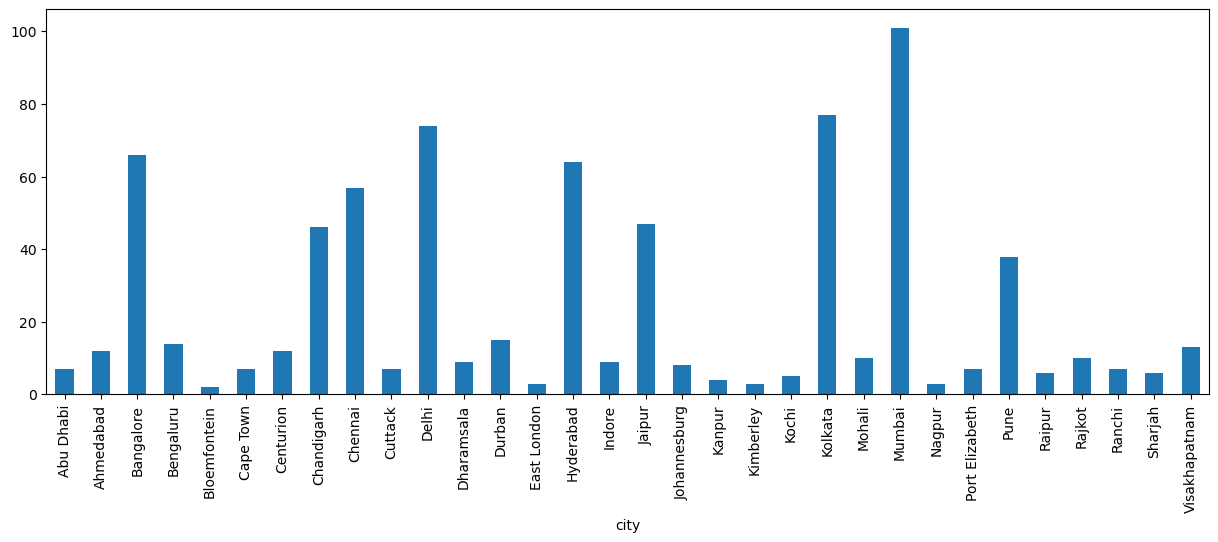

In [26]:
pd.crosstab( mt['season'], mt['city']).sum().plot(kind = 'bar', figsize = (15,5))

Mumbai is the top city 

#### Plot shows the most number of games played in the year

<Axes: xlabel='season'>

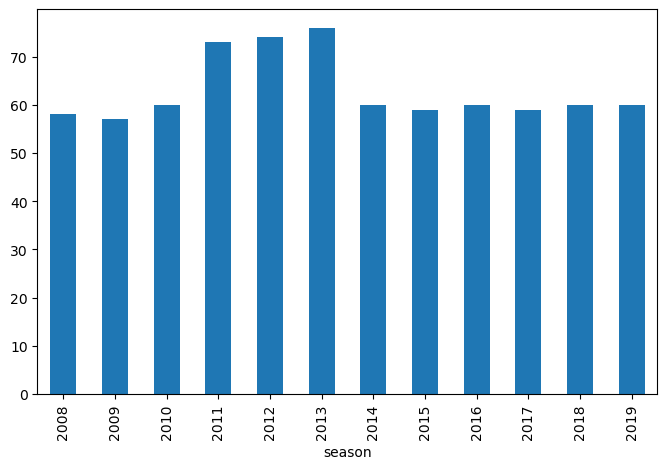

In [35]:
pd.crosstab(mt['id'] ,mt['season']).sum().plot(kind = 'bar', figsize = (8,5))

#### In 2011, number of games won by "Mumbai Indians"

In [47]:
len(mt[(mt['winner'] == "Mumbai Indians") & (mt['season'] == 2011)])

10

#### Percentage of toss_decision

<Axes: ylabel='toss_decision'>

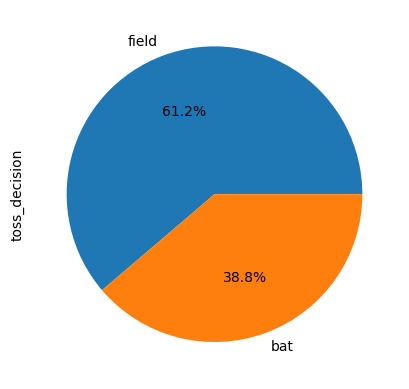

In [63]:
mt['toss_decision'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

#### Count of each toss_decisions where the team has won

In [68]:
len(mt[(mt['toss_winner'] == mt['winner']) & (mt['toss_decision'] == 'field')])

259

In [67]:
len(mt[(mt['toss_winner'] == mt['winner']) & (mt['toss_decision'] == 'bat')])

134

#### Per season count of winning teams who chose toss_decision as field

In [72]:
sort_mt = mt[(mt['toss_winner'] == mt['winner']) & (mt['toss_decision'] == 'field')]

In [82]:
pd.crosstab(sort_mt['winner'],sort_mt['season']).sum()

season
2008    19
2009    14
2010    10
2011    27
2012    18
2013    15
2014    24
2015    14
2016    32
2017    28
2018    27
2019    31
dtype: int64

In [108]:
pd.crosstab(dl['batsman'], dl['total_runs'])

total_runs,0,1,2,3,4,5,6,7,8,10
batsman,,,,,,,,,,
A Ashish Reddy,56,87,20,1,17,0,15,0,0,0
A Chandila,3,4,0,0,0,0,0,0,0,0
A Chopra,40,26,2,0,7,0,0,0,0,0
A Choudhary,4,13,1,0,1,0,1,0,0,0
A Dananjaya,2,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
YV Takawale,89,50,13,0,27,1,3,0,0,0
Yashpal Singh,37,22,2,1,5,0,0,0,0,0
Younis Khan,4,3,0,0,0,0,0,0,0,0


#### Batsman with maximum number of runs scored with 4's and 6's in 2019

In [106]:
merged[(merged['season'] == 2019) & ((merged['batsman_runs'] == 4) | (merged['batsman_runs'] == 6))].groupby(by = 'batsman').agg({'total_runs':'sum'}).sort_values(by = 'total_runs')

,total_runs
batsman,
CR Brathwaite,4
Kuldeep Yadav,4
M Markande,4
N Naik,4
DS Kulkarni,4
...,...
Q de Kock,334
KL Rahul,354
DA Warner,362


In [132]:
dl['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

#### Maximum wickets taken by the bowler

In [131]:
sort_bowl = dl[(dl['dismissal_kind'].isna() == False) & (dl['dismissal_kind'] != 'retired hurt')]

In [139]:
pd.crosstab(sort_bowl['dismissal_kind'],sort_bowl['bowler']).sum().sort_values()

bowler
D Salunkhe           1
AC Voges             1
LMP Simmons          1
LA Carseldine        1
BMAJ Mendis          1
                  ... 
PP Chawla          156
Harbhajan Singh    161
A Mishra           165
DJ Bravo           168
SL Malinga         188
Length: 352, dtype: int64

#### Striker rate of Kohli

In [196]:
merged[(merged['season'] == 2016)&(merged['batsman'] == 'V Kohli')]['total_runs'].sum()/merged[(merged['season'] == 2016)&(merged['batsman'] == 'V Kohli')]['ball'].sum()*100

44.4543429844098

#### Bowler with extra_runs

In [155]:
dl.groupby('bowler').agg({'extra_runs':'sum'}).sort_values('extra_runs')

,extra_runs
bowler,
Sachin Baby,0
CJ McKay,0
R Ninan,0
R Parag,0
C Munro,0
...,...
B Kumar,197
DJ Bravo,201
UT Yadav,219


#### Matches played in particular venue

In [158]:
mt['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

#### Player of the match on 2017 for the match played between 'Sunrisers Hyderabad' and 'Royal Challengers Bangalore'

In [165]:
mt[(mt['season'] == 2017) & (mt['team1'] == 'Sunrisers Hyderabad') & (mt['team2'] == 'Royal Challengers Bangalore')]['player_of_match']

0    Yuvraj Singh
Name: player_of_match, dtype: object

#### Count of run_out for each batsman

In [168]:
sort_run = dl[dl['dismissal_kind'] == 'run out']

In [171]:
sort_run.groupby('batsman').agg({'dismissal_kind': 'count'}).sort_values('dismissal_kind')

,dismissal_kind
batsman,
MC Juneja,1
Q de Kock,1
R Bishnoi,1
R Dhawan,1
R Sharma,1
...,...
G Gambhir,15
V Kohli,15
KD Karthik,16


Ms Dhoni is the top player for dismissal being run out

#### Total runs scored by kohli when the bowler is JJ Bumrah

In [178]:
dl[(dl['bowler'] == 'JJ Bumrah')&(dl['batsman'] == 'V Kohli')]['total_runs'].sum()

114

114 runs is scored by kohli when the bowler was bumrah

#### Count of 'Caught and bowled for each batsman'

In [182]:
sort_caught = dl[dl['dismissal_kind'] == 'caught and bowled']

In [183]:
sort_caught.groupby('batsman').agg({'dismissal_kind': 'count'}).sort_values('dismissal_kind')

,dismissal_kind
batsman,
A Flintoff,1
MA Agarwal,1
M Rawat,1
M Manhas,1
M Kaif,1
...,...
AM Rahane,5
RA Jadeja,5
R Dravid,5


SK Raina is the top player for caught and bowled dismissal.